In [15]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
path = "../data/number/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
df_number = pd.DataFrame(columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])
for file in onlyfiles:
    with open(path+file) as f:
        content = f.readlines()
        label = int(content[0])


    strokes = int(content[len(content)-1][11:12]) #How many strokes of the pen
    n_row = 3
    x = []
    y = []
    time_taken = []
    for _ in range(strokes):
        if n_row < len(content)-3:
            if(content[n_row] == "Pen Down (x,y)\n"):
                n_row += 1
                
            while content[n_row] != 'Pen Up\n' and content[n_row] != '\n': #Take all of the axis
                xi, yi = content[n_row].split('_')
                yi = yi[:-1]
                n_row += 1
                x.append(float(xi))
                y.append(float(yi))
                if n_row >= len(content)-3 :
                    break
            n_row += 1
            
            if content[n_row][0] == "T": #If there is written "Time_taken"
                time_taken.append(content[n_row][11:16])
                n_row += 1
                
            if content[n_row][0] == "T": #There are double "Time_taken"
                n_row += 1
                
    speed = content[len(content)-2][7:12]
    df_temp = pd.DataFrame([[label,x,y,time_taken, speed, strokes]], columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])
    df_number = pd.concat([df_number, df_temp])
    
df_number = df_number.drop(columns="time_taken")
            # Drop column time_taken beacuse is not good. It can be fixed
            # But it's not so important because we have also the ratio speed that is strokes/seconds


In [17]:
# df_number.to_csv("data/number/number.csv", index=False)

In [18]:
# df_number = pd.read_csv("data/number.csv")

# train_size = int(0.7*len(df_number))
df_number_train = df_number
# df_number_test = df_number[train_size:]

In [19]:
df_number_train[df_number_train['x'].map(lambda d: len(d)) > 0]

for i in range(len(df_number_train)):
    if df_number_train.iloc[i,1] == []:
        df_number_train.iloc[i,1] = np.nan

df_number_train.dropna(subset=['x'], inplace=True)
df_number_train

,label,x,y,speed,strokes
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1
0,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1
0,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1
0,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1
0,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1
...,...,...,...,...,...
0,9,"[728.0, 719.0, 710.0, 705.0, 694.0, 684.0, 672...","[147.0, 149.0, 151.0, 152.0, 156.0, 160.0, 165...",1.751,3
0,4,"[864.0, 826.0, 788.0, 775.0, 749.0, 724.0, 688...","[251.0, 320.0, 389.0, 411.0, 452.0, 490.0, 540...",2.908,2
0,2,"[234.0, 256.0, 266.0, 299.0, 313.0, 363.0, 382...","[155.0, 123.0, 112.0, 80.0, 70.0, 47.0, 41.0, ...",1.230,1
0,0,"[680.0, 670.0, 656.0, 643.0, 627.0, 609.0, 593...","[219.0, 223.0, 233.0, 248.0, 269.0, 297.0, 329...",1.049,1


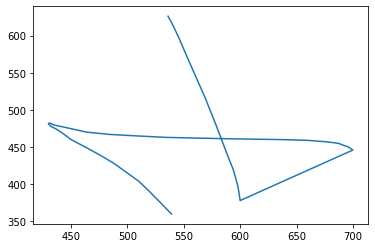

In [20]:
n = 45
# plt.plot(df_number['x'].iloc[0], df_number['y'].iloc[0])
plt.plot(df_number_train['x'].iloc[n], df_number_train['y'].iloc[n])
#plt.plot(df_number['x'].iloc[2], df_number['y'].iloc[2])
# plt.plot(df_number['x'].iloc[3], df_number['y'].iloc[3])

#Sono al contrario

In [21]:
df_number_train.iloc[n]

label                                                      4
x          [539.0, 530.0, 519.0, 510.0, 499.0, 488.0, 477...
y          [360.0, 374.0, 391.0, 404.0, 416.0, 428.0, 438...
speed                                                  2.919
strokes                                                    2
Name: 0, dtype: object

In [22]:
# Take only a subset of the dataframe
# df_number_train = df_number_train[:10]  #THEN REMOVE

# RIMUOVO QUELLI CON PIÙ DI UN STROKE PERCHÉ MI ROMPONO IL CAZZO (poi aggiustare)
#df_number_train = df_number_train[df_number_train['strokes'] == 1]

# Rimuovo tutte quelle con < 11 (x,y)
df_number_train = df_number_train[df_number_train['x'].map(lambda d: len(d)) > 15]

index = pd.Series(np.arange(len(df_number_train)))
df_number_train.set_index(index, inplace=True)

In [23]:
# Calculate angle between two points in a strange mathod (BUT correct)

def calculate_arctan2_of_two_points(x1, y1, x2, y2):
    angle = np.arctan2(y2-y1, x2-x1)
    return angle

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])-1):
        angle = calculate_arctan2_of_two_points(number['x'][p], number['y'][p], number['x'][p+1], number['y'][p+1])
        angle = round(angle, 2)
        vector_of_angles.append(angle)
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)


df_number_train['arctan2_2'] = angles
df_number_train.head()

/tmp/ipykernel_13417/2100225661.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['arctan2_2'] = angles


,label,x,y,speed,strokes,arctan2_2
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1,"[-0.29, -1.57, 3.09, 3.11, 3.14, 3.12, 3.12, 3..."
1,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1,"[1.05, 1.19, 1.41, 1.48, 1.52, 1.54, 1.54, 1.4..."
2,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1,"[-0.27, -0.13, -0.1, -0.02, 0.14, 0.38, 0.62, ..."
3,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1,"[-0.77, -0.74, -0.59, -0.44, -0.26, -0.05, 0.0..."
4,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1,"[-0.32, -0.18, -0.09, 0.07, 0.29, 0.58, 1.04, ..."


In [24]:
def calculate_arctan2(x1, y1):
    angle = np.arctan2(y1, x1)
    return angle

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])):
        angle = calculate_arctan2(number['x'][p], number['y'][p])
        angle = round(angle, 2)
        vector_of_angles.append(angle)
    angles.append(vector_of_angles)


df_number_train['arctan_1'] = angles
df_number_train.head()

/tmp/ipykernel_13417/1718250237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['arctan_1'] = angles


,label,x,y,speed,strokes,arctan2_2,arctan_1
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1,"[-0.29, -1.57, 3.09, 3.11, 3.14, 3.12, 3.12, 3...","[0.23, 0.22, 0.22, 0.23, 0.25, 0.27, 0.29, 0.3..."
1,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1,"[1.05, 1.19, 1.41, 1.48, 1.52, 1.54, 1.54, 1.4...","[0.21, 0.22, 0.23, 0.26, 0.29, 0.35, 0.39, 0.4..."
2,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1,"[-0.27, -0.13, -0.1, -0.02, 0.14, 0.38, 0.62, ...","[0.3, 0.25, 0.23, 0.21, 0.19, 0.19, 0.19, 0.21..."
3,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1,"[-0.77, -0.74, -0.59, -0.44, -0.26, -0.05, 0.0...","[0.42, 0.35, 0.33, 0.26, 0.24, 0.2, 0.19, 0.18..."
4,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1,"[-0.32, -0.18, -0.09, 0.07, 0.29, 0.58, 1.04, ...","[0.08, 0.06, 0.04, 0.03, 0.03, 0.05, 0.07, 0.1..."


In [25]:
# df_number_train
# B è la distanza da quello prima
# C è la distanza da quello dopo
# A è la tangente del punto

angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(4,len(number['x'])-4):
        B = np.sqrt((number['x'][p] - number['x'][p+4])**2 + (number['y'][p] - number['y'][p+4])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-4])**2 + (number['y'][p] - number['y'][p-4])**2)
        A = np.sqrt((number['x'][p+4] - number['x'][p-4])**2 + (number['y'][p+4] - number['y'][p-4])**2)
        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['curvature_4'] = angles
# df_number_train['angles_tangent'].iloc[10] #- df_number_train['angles'].iloc[10]
# list(set(df_number_train['angles_tangent'].iloc[10]) - set(df_number_train['angles'].iloc[10]))
# df_number_train

/tmp/ipykernel_13417/1086880219.py:16: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))
/tmp/ipykernel_13417/1086880219.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['curvature_4'] = angles


In [26]:
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(2,len(number['x'])-2):
        B = np.sqrt((number['x'][p] - number['x'][p+2])**2 + (number['y'][p] - number['y'][p+2])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-2])**2 + (number['y'][p] - number['y'][p-2])**2)
        A = np.sqrt((number['x'][p+2] - number['x'][p-2])**2 + (number['y'][p+2] - number['y'][p-2])**2)
        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['curvature_2'] = angles

/tmp/ipykernel_13417/938614773.py:11: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))
/tmp/ipykernel_13417/938614773.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['curvature_2'] = angles


In [27]:
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(1,len(number['x'])-1):
        B = np.sqrt((number['x'][p] - number['x'][p+1])**2 + (number['y'][p] - number['y'][p+1])**2)
        C = np.sqrt((number['x'][p] - number['x'][p-1])**2 + (number['y'][p] - number['y'][p-1])**2)
        A = np.sqrt((number['x'][p+1] - number['x'][p-1])**2 + (number['y'][p+1] - number['y'][p-1])**2)
        angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))          
        angle = round(angle, 4)
        if np.isnan(angle): #To fix
            angle = 0
        vector_of_angles.append(angle)
            
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)

df_number_train['curvature_1'] = angles

/tmp/ipykernel_13417/3421169458.py:11: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arccos(round((B**2 + C**2 - A**2)/(2*B*C), 5))
/tmp/ipykernel_13417/3421169458.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['curvature_1'] = angles


In [28]:

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])-2):
        angle = (number['x'][p]+number['x'][p+2])/2

        vector_of_angles.append(angle)
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)


df_number_train['x_smooth'] = angles
# df_number_train.head()

/tmp/ipykernel_13417/1448453477.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['x_smooth'] = angles


In [29]:
# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['y'])-2):
        angle = (number['y'][p]+number['y'][p+2])/2

        vector_of_angles.append(angle)
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)


df_number_train['y_smooth'] = angles
df_number_train.head()

/tmp/ipykernel_13417/2400413975.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['y_smooth'] = angles


,label,x,y,speed,strokes,arctan2_2,arctan_1,curvature_4,curvature_2,curvature_1,x_smooth,y_smooth
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1,"[-0.29, -1.57, 3.09, 3.11, 3.14, 3.12, 3.12, 3...","[0.23, 0.22, 0.22, 0.23, 0.25, 0.27, 0.29, 0.3...","[3.0894, 3.0551, 2.9393, 2.341, 1.9102, 1.8194...","[0.2963, 3.1306, 3.1064, 3.1371, 3.0898, 2.847...","[1.8569, 1.5168, 3.1232, 3.1058, 3.1249, 3.133...","[916.5, 906.5, 878.5, 826.5, 768.5, 714.0, 671...","[209.0, 207.5, 208.0, 209.0, 210.5, 211.0, 213..."
1,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1,"[1.05, 1.19, 1.41, 1.48, 1.52, 1.54, 1.54, 1.4...","[0.21, 0.22, 0.23, 0.26, 0.29, 0.35, 0.39, 0.4...","[2.9492, 3.1018, 3.1353, 3.087, 3.0896, 3.1243...","[2.7897, 3.002, 3.0512, 3.109, 3.1221, 3.0736,...","[3.0029, 2.9262, 3.0714, 3.0953, 3.1261, 3.141...","[644.0, 650.0, 652.0, 655.0, 656.5, 658.0, 660...","[142.5, 161.5, 174.5, 207.0, 232.5, 269.5, 308..."
2,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1,"[-0.27, -0.13, -0.1, -0.02, 0.14, 0.38, 0.62, ...","[0.3, 0.25, 0.23, 0.21, 0.19, 0.19, 0.19, 0.21...","[2.603, 2.3149, 2.0692, 1.7572, 1.5605, 1.6897...","[2.9751, 2.9636, 2.8969, 2.6776, 2.5686, 2.547...","[3.0034, 3.1116, 3.0616, 2.9844, 2.8987, 2.905...","[536.0, 586.5, 623.5, 681.0, 714.0, 758.5, 773...","[145.5, 136.0, 134.0, 136.0, 138.5, 151.5, 164..."
3,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1,"[-0.77, -0.74, -0.59, -0.44, -0.26, -0.05, 0.0...","[0.42, 0.35, 0.33, 0.26, 0.24, 0.2, 0.19, 0.18...","[2.5415, 2.4137, 2.3724, 2.2601, 2.1549, 2.183...","[2.9311, 2.8209, 2.7986, 2.8032, 2.8108, 2.638...","[3.113, 2.9918, 2.9934, 2.9591, 2.9342, 3.0261...","[500.0, 534.5, 548.5, 598.0, 616.5, 675.5, 694...","[196.0, 169.0, 160.0, 138.5, 134.0, 128.5, 131..."
4,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1,"[-0.32, -0.18, -0.09, 0.07, 0.29, 0.58, 1.04, ...","[0.08, 0.06, 0.04, 0.03, 0.03, 0.05, 0.07, 0.1...","[2.1267, 1.8394, 1.737, 1.7665, 1.9132, 2.1372...","[2.9233, 2.8223, 2.6943, 2.4563, 2.3373, 2.324...","[3.0038, 3.0511, 2.9815, 2.9201, 2.8518, 2.676...","[542.5, 570.5, 607.0, 636.5, 663.0, 687.0, 699...","[31.0, 25.5, 22.5, 25.0, 33.5, 55.5, 78.0, 119..."


In [31]:
# train test split

X_train, test = train_test_split(df_number_train, test_size=0.2, random_state=42)

%store test

print("shapes: ", X_train.shape, test.shape)

Stored 'test' (DataFrame)
shapes:  (991, 12) (248, 12)


In [32]:
#Divide the dataframe for each label 
# Since we will contruct a HMM for each label

temp = X_train.groupby(['label'])
df_classes = {}
# for row in df_number_train:
#     df_classes[row]['label'].append(row)
for name, group in temp:
    df_classes[name] = group
    print("len of class ", name, ": ", len(group))


# See if x and y are only numbers (Se ho sbagliato ad importare da tutti i file txt)
for name, group in df_classes.items():
    for i in range(len(group)):
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['arctan2_2']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['arctan2_2']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")

#Divide the dataset into the different classes

len of class  0 :  89
len of class  1 :  66
len of class  2 :  105
len of class  3 :  104
len of class  4 :  103
len of class  5 :  108
len of class  6 :  108
len of class  7 :  100
len of class  8 :  109
len of class  9 :  99


In [33]:
%store df_classes

Stored 'df_classes' (dict)


Dataset is balanced


## HMM problem and solutions
* Evaluation:
    * Problem - Compute Probabilty of observation sequence given a model
    * Solution - Forward Algorithm and Viterbi Algorithm
* Decoding:
    * Problem - Find state sequence which maximizes probability of observation sequence
    * Solution - Viterbi Algorithm
* Training:
    * Problem - Adjust model parameters to maximize probability of observed sequences
    * Solution - Forward-Backward Algorithm

## Correlation

In [34]:
from scipy.stats import pearsonr

In [35]:

# print("Pearson correlation coefficient:" , pearsonr(data1, data2))

# def mean_pearsonr_correlation(data1, data2):
#     pearsonr_correlation = []
#     for i in range(len(data1)):
#         for j in range(len(data1[i])):
#             pearsonr_correlation.append(pearsonr(data1[i][j], data2[i][j]))
#         # pearsonr_correlation.append(pearsonr(data1[i], data2[i]))
#     return pearsonr_correlation

# # for i in range(len(data1)):
mean = 0
for i in range(len(X_train)):
    data1 = X_train['arctan_1'].iloc[i]
    data2 = X_train['curvature_1'].iloc[i] 
    corr, _ = pearsonr(data1, data2)
    mean = mean + corr
mean = mean/len(X_train)

print("Pearson correlation coefficient:" , mean)

ValueError: x and y must have the same length.